In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

C:\Users\wlgns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
y = y.astype(np.uint8)

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [6]:
enc.fit(y[:,np.newaxis])

C:\Users\wlgns\AppData\Local\Temp\ipykernel_15584\4241405308.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  enc.fit(y[:,np.newaxis])


OneHotEncoder()

In [7]:
Y = enc.transform(y[:,np.newaxis]).toarray()

C:\Users\wlgns\AppData\Local\Temp\ipykernel_15584\752173705.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y = enc.transform(y[:,np.newaxis]).toarray()


In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def softmax(X, W):
    K = np.size(W, 1)
    A = np.exp(X @ W)
    B = np.diag(1 / (np.reshape(A @ np.ones((K,1)), -1)))
    Y = B @ A
    return Y

In [12]:
def compute_cost(X, T, W, L):
    epsilon = 1e-5
    N = len(T)
    K = np.size(T, 1)
    cost = - (1/N) * np.ones((1,N)) @ (np.multiply(np.log(softmax(X, W) + epsilon), T)) @ np.ones((K,1)) + 1 / 2 * L * np.sum(W ** 2)
    # cost = - (1/N) * np.ones((1,N)) @ (np.multiply(np.log(softmax(X, W) + epsilon), T)) @ np.ones((K,1))
    return cost

In [13]:
def predict(X, W):
    return np.argmax((X @ W), axis=1)

In [14]:
def batch_gd(X, T, W, learning_rate, iterations, batch_size, L):
    N = len(T)
    cost_history = np.zeros((iterations,1))
    shuffled_indices = np.random.permutation(N)
    X_shuffled = X[shuffled_indices]
    T_shuffled = T[shuffled_indices]

    for i in range(iterations):
        j = i % N
        X_batch = X_shuffled[j:j+batch_size]
        T_batch = T_shuffled[j:j+batch_size]
        # batch가 epoch 경계를 넘어가는 경우, 앞 부분으로 채워줌
        if X_batch.shape[0] < batch_size:
            X_batch = np.vstack((X_batch, X_shuffled[:(batch_size - X_batch.shape[0])]))
            T_batch = np.vstack((T_batch, T_shuffled[:(batch_size - T_batch.shape[0])]))
        W = W - (learning_rate/batch_size) * (X_batch.T @ (softmax(X_batch, W) - T_batch))
        cost_history[i] = compute_cost(X_batch, T_batch, W, L)
        if i % 1000 == 0:
            print(cost_history[i][0])

    return (cost_history, W)

In [17]:
X = np.hstack((np.ones((np.size(X_train, 0),1)),X_train))
T = y_train

K = np.size(T, 1)
M = np.size(X, 1)
W = np.zeros((M,K))

iterations = 50000
learning_rate = 0.01

initial_cost = compute_cost(X, T, W, 0)

print("Initial Cost is: {} \n".format(initial_cost[0][0]))
lambda_list = np.arange(-0.1, 0.1+0.01, 0.01)
score_list = []
for L in lambda_list:
    (cost_history, W_optimal) = batch_gd(X, T, W, learning_rate, iterations, 64, L)
    #X_ = np.hstack((np.ones((np.size(X_test, 0),1)),X_test))
    #T_ = y_test
    y_pred = predict(X, W_optimal)
    score = float(sum(y_pred == np.argmax(T, axis=1)))/ float(len(y_test))
    score_list.append((L,score))
    print(score)

Initial Cost is: 2.3024850979937166 

2.2794856599048408
-0.11862543435317074
-0.5749953110428943
-0.882033710215384
-1.2640268282971379
-1.5109795112437294
-1.6973697323889363
-1.9749613746075751
-2.1501108779292077
-2.286760604653302
-2.3567231471029704
-2.6022955466998257
-2.6371799393278
-2.787894532259428
-2.9095981787898695
-3.0525441901928287
-3.279487181500601
-3.2585641445584987
-3.125952035743534
-3.400700820388839
-3.514886098934877
-3.6938957567055737
-3.865210875596078
-4.151963710078542
-4.068709722905827
-4.165814122870659
-4.06034516421419
-4.319000359041156
-4.505360746711678
-4.323352311448229
-4.657156424677762
-4.621707308531078
-4.788999788089817
-4.8997605173361745
-4.989015053674583
-4.977464050919492
-5.099717868737429
-5.042221187757772
-5.138988414646527
-5.16294465016014
-5.519661594287046
-5.6008937861039
-5.657178962779769
-5.63866300202467
-5.7421844904963
-5.801617316336423
-5.736183040268954
-5.792548429135636
-6.014480317807049
-6.026233029891719
5.4954

<class 'numpy.ndarray'> <class 'list'>
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\lib.pyx", line 2363, in pandas._libs.lib.maybe_convert_numeric
TypeError: Invalid object type

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\wlgns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\wlgns\AppData\Local\Temp\ipykernel_15584\1799793133.py", line 3, in <module>
    sns.lineplot(x=lambda_list,y=score_list)
  File "C:\Users\wlgns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\relational.py", line 645, in lineplot
    p.plot(ax, kwargs)
  File "C:\Users\wlgns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python31

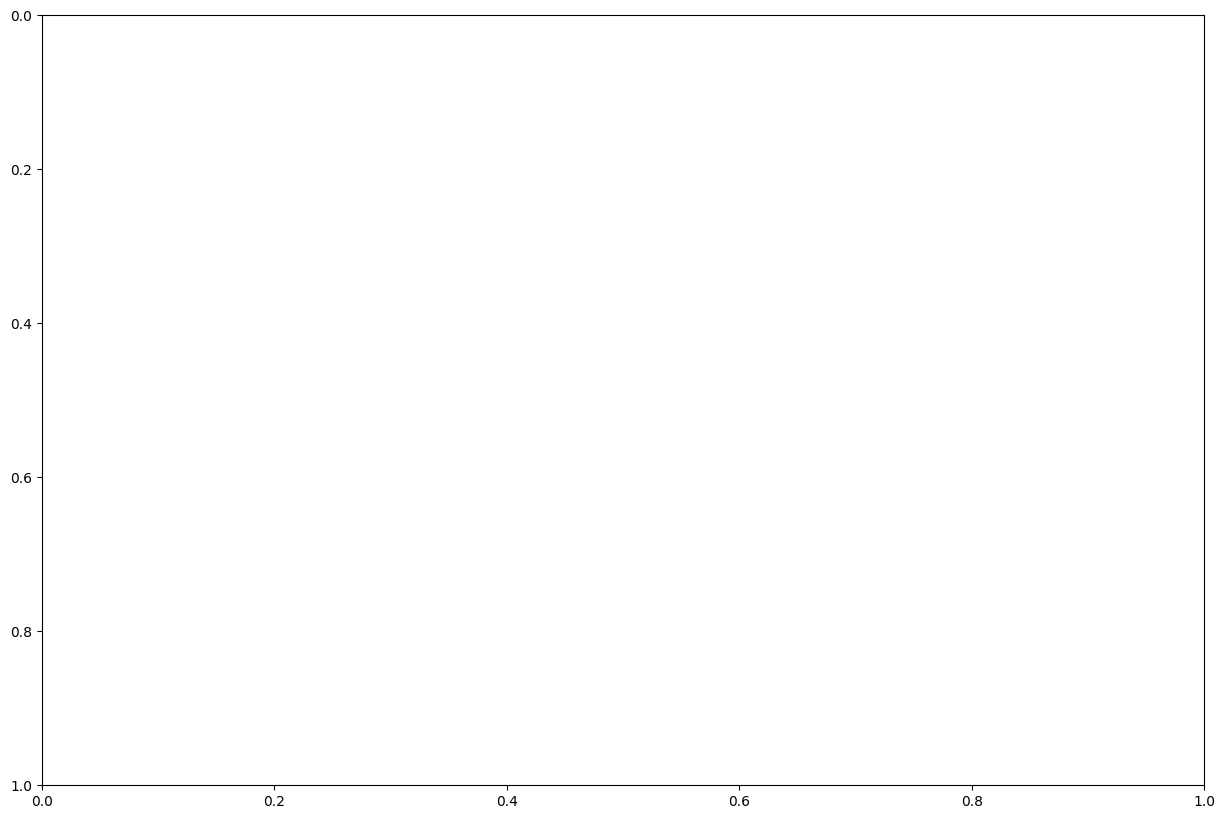

In [26]:
plt.figure(figsize= (15,10))
print(type(lambda_list),type(score_list))
sns.lineplot(x=lambda_list,y=score_list)
plt.show()

In [ ]:
## Accuracy
X_ = np.hstack((np.ones((np.size(X_test, 0),1)),X_test))
T_ = y_test
y_pred = predict(X_, W_optimal)
score = float(sum(y_pred == np.argmax(T_, axis=1)))/ float(len(y_test))

print(score)